# **Football Results Predictor**

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

The following chunks load the data and select the specific columns that will be used for the EDA and the modelling phase.

In [ ]:
data = pd.read_csv("E0.csv")
data

In [ ]:
table = data.iloc[:, 0:47]
table

The chunk below is assigning a number depending on the result of the matches played. It assigns a 1 for HomeWin and AwayLoss, or 1 for HomeDraw and AwayDraw, and finally, a 1 for HomeLoss and AwayWin.

In [ ]:
table['HomeWin'] = table['FTR'].apply(lambda x: 1 if x is 'H' else 0)
table['HomeDraw'] = table['FTR'].apply(lambda x: 1 if x is 'D' else 0)
table['HomeLoss'] = table['FTR'].apply(lambda x: 1 if x is 'A' else 0)

table['AwayWin'] = table['FTR'].apply(lambda x: 1 if x is 'A' else 0)
table['AwayDraw'] = table['FTR'].apply(lambda x: 1 if x is 'D' else 0)
table['AwayLoss'] = table['FTR'].apply(lambda x: 1 if x is 'H' else 0)

table

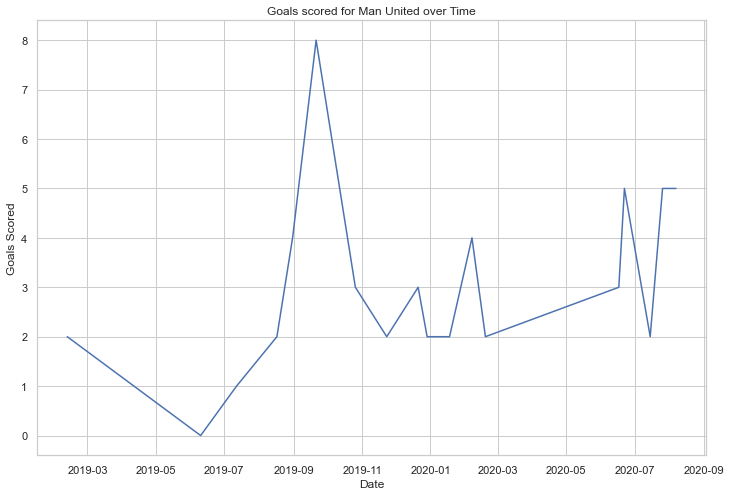

In [2126]:
table['Date'] = pd.to_datetime(table['Date'])

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.lineplot(data = table[table['HomeTeam'] == 'Man City'], x = 'Date', y = 'FTHG')
plt.ylabel("Goals Scored")
plt.xlabel("Date")
plt.title("Goals scored for Man United over Time")
plt.show(fig)

The chart shown above displays the goals scored for Manchester City, which have the highest goal tally in the league. Their highest goals scored in one match was 8 goals against Watford and a minimum value of 0 goals. 

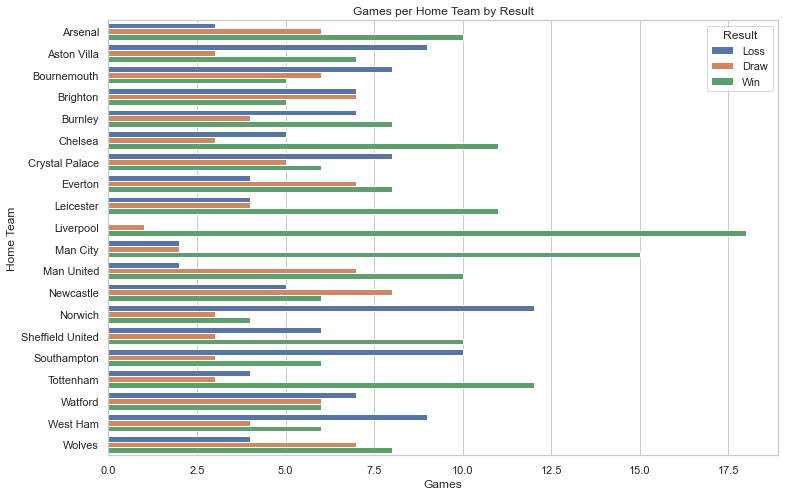

In [2127]:
group = table.groupby(['HomeTeam', 'FTR'], as_index = False).count()

group = group.replace(['A', 'D', 'H'], ['Loss', 'Draw', 'Win'])

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.barplot(data = group, y = 'HomeTeam', x = 'ID', hue = 'FTR')
plt.ylabel("Home Team")
plt.xlabel("Games")
plt.title("Games per Home Team by Result")
plt.legend(title="Result")
plt.show(fig)

The chart shown above displays all the games played from the home team perspective and shows the result of the match from the same point of view. A strange anomaly was that Liverpool do not have any data for losses. However, after observing the data, it was discovered that during the 2019/2020 season Liverpool did not lose any games at home. 

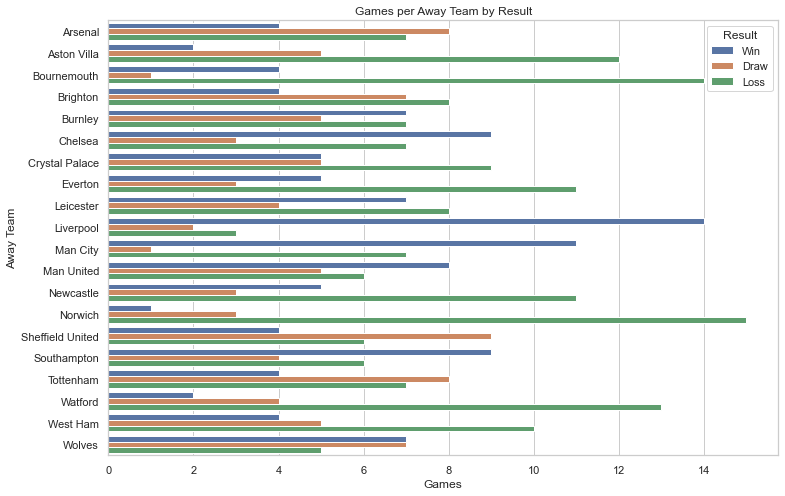

In [2128]:
group = table.groupby(['AwayTeam', 'FTR'], as_index = False).count()

group = group.replace(['A', 'D', 'H'], ['Win', 'Draw', 'Loss'])

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.barplot(data = group, y = 'AwayTeam', x = 'ID', hue = 'FTR')
plt.ylabel("Away Team")
plt.xlabel("Games")
plt.title("Games per Away Team by Result")
plt.legend(title="Result")
plt.show(fig)

The chart shown above displays the number of games played from the perspective of the away team as well as the result from their point of view. This chart shows all three different results for all the teams as opposed to the first one. 

In [ ]:
GeneralStats = table.groupby(["HomeTeam"]).agg({"HomeTeam" : "count", "FTHG" : "mean", "HomeWin" : "sum", "HomeDraw" : "sum", "HomeLoss" : "sum", "FTHG" : "sum", "HS" : "sum"})
AwayStats = table.groupby(["AwayTeam"]).agg({"AwayTeam" : "count", "FTAG" : "mean", "AwayWin" : "sum", "AwayDraw" : "sum", "AwayLoss" : "sum", "FTAG" : "sum", "AS" : "sum"})

FullTable = pd.concat([GeneralStats, AwayStats], axis = 1)
FullTable["Points"] = FullTable["HomeWin"] * 3 + FullTable["AwayWin"] * 3 + FullTable["HomeDraw"]*1 + FullTable["AwayDraw"]*1
FullTable["HWinPerc%"] = FullTable["HomeWin"] / FullTable["HomeTeam"]
FullTable["AWinPerc%"] = FullTable["AwayWin"] / FullTable["AwayTeam"]
FullTable["Goals"] = FullTable["FTHG"] + FullTable["FTAG"]
FullTable["ConversionRate%"] = (FullTable["Goals"] / (FullTable['HS'] + FullTable['AS'])) * 100
FullTable['Wins'] = FullTable['HomeWin'] + FullTable['AwayWin']
FullTable['Draws'] = FullTable['HomeDraw'] + FullTable['AwayDraw']
FullTable['Losses'] = FullTable['HomeLoss'] + FullTable['AwayLoss']
FullTable = FullTable.sort_values("Points", ascending = False)
FullTable = FullTable.drop(columns = ['HS', 'AS'])

FullTable

The table shown above contains additional data that can be used for observing the general statistics for all the teams at the end of the season. It assigns each team the appropriate number of points depending on their results. It also displays all the goals each teams scored at home and away from home. Two additional columns calculated are the home win percentage and away win percentage, which are calculated by dividing the home wins or away wins by the respective number of games played home and away. The goals scored are summed together to make another column. The number of shots home and away per team are added together. Finally, the number of goals scored is divided by the total number of shots in order to get the conversion rate percentage per team. 

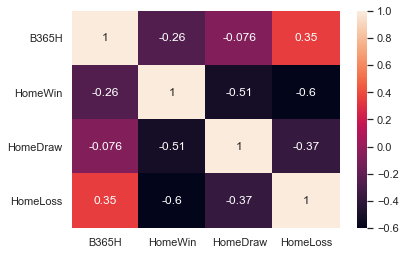

In [2130]:
variables = ["B365H", "HomeWin", "HomeDraw", "HomeLoss"]
correlation = np.corrcoef(table[variables].values, rowvar=0)
sns.heatmap(correlation, annot=True, annot_kws={'size': 12},
 yticklabels=variables,
 xticklabels=variables)
plt.show()

The figure shown above is a heatmap detailing the correlations between the betting company's odds that the home team will win the match. This diagram shows that when the odds that the home team will win, it is more likely that they will lose with a 0.35 correlation. The odds that the home team predicted to win, actually wins is -0.26% 

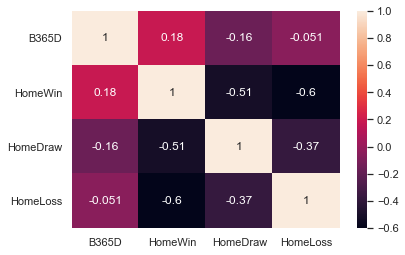

In [2131]:
variables = ["B365D", "HomeWin", "HomeDraw", "HomeLoss"]
correlation = np.corrcoef(table[variables].values, rowvar=0)
sns.heatmap(correlation, annot=True, annot_kws={'size': 12},
 yticklabels=variables,
 xticklabels=variables)
plt.show()

The figure shown above is a heatmap detailing the correlations between the betting company's odds that the home team will draw the match. This diagram shows that when the odds that the home team will draw, it is more likely that they will win with a 0.18 correlation. The odds that the home team predicted to draw, actually ties is -0.16% 

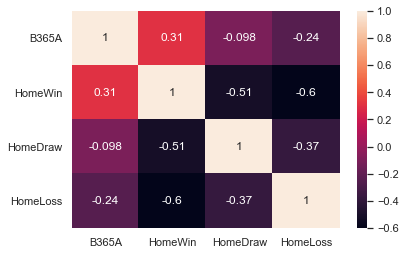

In [2132]:
variables = ["B365A", "HomeWin", "HomeDraw", "HomeLoss"]
correlation = np.corrcoef(table[variables].values, rowvar=0)
sns.heatmap(correlation, annot=True, annot_kws={'size': 12},
 yticklabels=variables,
 xticklabels=variables)
plt.show()

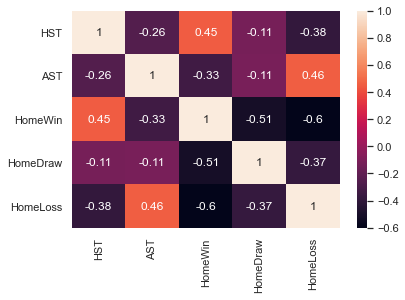

In [2133]:
variables = ["HST", "AST", "HomeWin", "HomeDraw", "HomeLoss"]
correlation = np.corrcoef(table[variables].values, rowvar=0)
sns.heatmap(correlation, annot=True, annot_kws={'size': 12},
 yticklabels=variables,
 xticklabels=variables)
plt.show()

The figure shown above is a heatmap detailing the correlations between the betting company's odds that the home team will lose the match. This diagram shows that when the odds that the home team will lose, it is more likely that they will win with a 0.31 correlation. The odds that the home team predicted to lose, actually losses is -0.24% 

In [2134]:
table

,ID,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,MaxD,MaxA,AvgH,AvgD,HomeWin,HomeDraw,HomeLoss,AwayWin,AwayDraw,AwayLoss
0,1,2019-09-08,20:00,Liverpool,Norwich,4,1,H,4,0,...,10.00,23.00,1.14,8.75,1,0,0,0,0,1
1,2,2019-10-08,12:30,West Ham,Man City,0,5,A,0,1,...,6.75,1.29,11.84,6.28,0,0,1,1,0,0
2,3,2019-10-08,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,3.65,4.00,2.01,3.53,0,1,0,0,1,0
3,4,2019-10-08,15:00,Burnley,Southampton,3,0,H,0,0,...,3.33,2.85,2.68,3.22,1,0,0,0,0,1
4,5,2019-10-08,15:00,Crystal Palace,Everton,0,0,D,0,0,...,3.40,2.52,3.13,3.27,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,376,2020-07-26,16:00,Leicester,Man United,0,2,A,0,0,...,4.54,2.35,3.17,3.49,0,0,1,1,0,0
376,377,2020-07-26,16:00,Man City,Norwich,5,0,H,2,0,...,15.25,41.00,1.07,12.80,1,0,0,0,0,1
377,378,2020-07-26,16:00,Newcastle,Liverpool,1,3,A,1,1,...,5.40,1.45,7.60,4.99,0,0,1,1,0,0
378,379,2020-07-26,16:00,Southampton,Sheffield United,3,1,H,0,1,...,3.60,3.56,2.18,3.47,1,0,0,0,0,1


The chunk below assigns a number depending on the result of the match. A 0 means that the home team won, a 1 means that match concluded as a draw, and a 2 means that the away team won. 

In [2135]:
result = {'H' : 0, 'D': 1, 'A': 2}
table.FTR = [result[item] for item in data.FTR]

table

,ID,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,MaxD,MaxA,AvgH,AvgD,HomeWin,HomeDraw,HomeLoss,AwayWin,AwayDraw,AwayLoss
0,1,2019-09-08,20:00,Liverpool,Norwich,4,1,0,4,0,...,10.00,23.00,1.14,8.75,1,0,0,0,0,1
1,2,2019-10-08,12:30,West Ham,Man City,0,5,2,0,1,...,6.75,1.29,11.84,6.28,0,0,1,1,0,0
2,3,2019-10-08,15:00,Bournemouth,Sheffield United,1,1,1,0,0,...,3.65,4.00,2.01,3.53,0,1,0,0,1,0
3,4,2019-10-08,15:00,Burnley,Southampton,3,0,0,0,0,...,3.33,2.85,2.68,3.22,1,0,0,0,0,1
4,5,2019-10-08,15:00,Crystal Palace,Everton,0,0,1,0,0,...,3.40,2.52,3.13,3.27,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,376,2020-07-26,16:00,Leicester,Man United,0,2,2,0,0,...,4.54,2.35,3.17,3.49,0,0,1,1,0,0
376,377,2020-07-26,16:00,Man City,Norwich,5,0,0,2,0,...,15.25,41.00,1.07,12.80,1,0,0,0,0,1
377,378,2020-07-26,16:00,Newcastle,Liverpool,1,3,2,1,1,...,5.40,1.45,7.60,4.99,0,0,1,1,0,0
378,379,2020-07-26,16:00,Southampton,Sheffield United,3,1,0,0,1,...,3.60,3.56,2.18,3.47,1,0,0,0,0,1


The chunk below creates a moving average for one previous match, which replaces all the used columns. This is done to create multiple columns that will be used for the modelling to be able to predict the results of the match. Since the code is using the data of the previous match, it assigned the first gameweek of the league (first 20 matches/rows) na values, which were then dropped. Finally, by dividing the na values by the full table shows that 5.26% of the data has been removed due to missing values

In [2136]:
table['FTHG'] = table.groupby('HomeTeam')['FTHG'].transform(lambda x: x.rolling(2).mean())
table['FTAG'] = table.groupby('HomeTeam')['FTAG'].transform(lambda x: x.rolling(2).mean())
table['HTHG'] = table.groupby('HomeTeam')['HTHG'].transform(lambda x: x.rolling(2).mean())
table['HTAG'] = table.groupby('HomeTeam')['HTAG'].transform(lambda x: x.rolling(2).mean())
table['HS'] = table.groupby('HomeTeam')['HS'].transform(lambda x: x.rolling(2).mean())
table['AS'] = table.groupby('HomeTeam')['AS'].transform(lambda x: x.rolling(2).mean())
table['HST'] = table.groupby('HomeTeam')['HST'].transform(lambda x: x.rolling(2).mean())
table['AST'] = table.groupby('HomeTeam')['AST'].transform(lambda x: x.rolling(2).mean())
table['HF'] = table.groupby('HomeTeam')['HF'].transform(lambda x: x.rolling(2).mean())
table['AF'] = table.groupby('HomeTeam')['AF'].transform(lambda x: x.rolling(2).mean())
table['HC'] = table.groupby('HomeTeam')['HC'].transform(lambda x: x.rolling(2).mean())
table['AC'] = table.groupby('HomeTeam')['AC'].transform(lambda x: x.rolling(2).mean())
table['HY'] = table.groupby('HomeTeam')['HY'].transform(lambda x: x.rolling(2).mean())
table['AY'] = table.groupby('HomeTeam')['AY'].transform(lambda x: x.rolling(2).mean())
table['HR'] = table.groupby('HomeTeam')['HR'].transform(lambda x: x.rolling(2).mean())
table['AR'] = table.groupby('HomeTeam')['AR'].transform(lambda x: x.rolling(2).mean())

table

,ID,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,MaxD,MaxA,AvgH,AvgD,HomeWin,HomeDraw,HomeLoss,AwayWin,AwayDraw,AwayLoss
0,1,2019-09-08,20:00,Liverpool,Norwich,NaN,NaN,0,NaN,NaN,...,10.00,23.00,1.14,8.75,1,0,0,0,0,1
1,2,2019-10-08,12:30,West Ham,Man City,NaN,NaN,2,NaN,NaN,...,6.75,1.29,11.84,6.28,0,0,1,1,0,0
2,3,2019-10-08,15:00,Bournemouth,Sheffield United,NaN,NaN,1,NaN,NaN,...,3.65,4.00,2.01,3.53,0,1,0,0,1,0
3,4,2019-10-08,15:00,Burnley,Southampton,NaN,NaN,0,NaN,NaN,...,3.33,2.85,2.68,3.22,1,0,0,0,0,1
4,5,2019-10-08,15:00,Crystal Palace,Everton,NaN,NaN,1,NaN,NaN,...,3.40,2.52,3.13,3.27,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,376,2020-07-26,16:00,Leicester,Man United,1.0,1.0,2,0.5,0.0,...,4.54,2.35,3.17,3.49,0,0,1,1,0,0
376,377,2020-07-26,16:00,Man City,Norwich,3.5,0.5,0,2.0,0.0,...,15.25,41.00,1.07,12.80,1,0,0,0,0,1
377,378,2020-07-26,16:00,Newcastle,Liverpool,1.0,3.0,2,0.5,1.0,...,5.40,1.45,7.60,4.99,0,0,1,1,0,0
378,379,2020-07-26,16:00,Southampton,Sheffield United,2.0,1.0,0,0.0,1.0,...,3.60,3.56,2.18,3.47,1,0,0,0,0,1


In [ ]:
all_rows = len(table)
na_rows = len(table[table.isnull().any(axis = 1)])
p = (na_rows / all_rows) * 100
print(f'Number of rows with na values: {na_rows}, {round(p, 2)}% of all rows')

table = table.dropna().reset_index()

The following chunks are part of the modelling section for the predictions. First we import the train test split from the sklearn model selection. Then we populate the training and testing dataframes with the relevant columns that will be used for the predictions. The training columns are the goals scored by home and away teams at full time and half time, the odds from Bet 365 of the home team winning, drawing, and losing, the number of shots on target for the home and away teams. The test dataset contains the full time result, which is what will be predicted. Then we load the X and y train and test datasets and then use the train test split. The test size is 20% of the whole dataset and assign a random state. The random forest classifier will be used as it is the most relevant model for the predictions and then we fit the x and y train data. then the predictions are made which generate an array of the results, and finally get the score of the predictions using the x and y test. The accuracy of this model is 66.6%.

In [2005]:
from sklearn.model_selection import train_test_split

In [2049]:
train = table[['FTHG', 'FTAG', 'HTHG', 'HTAG', 'B365H', 'B365D', 'B365A', 'HST', 'AST']]
test = table["FTR"]

In [2034]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.2, random_state=42)

In [2035]:
rf = RandomForestClassifier(random_state = 42)

In [2036]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [2037]:
rfPred = rf.predict(X_test)
rfPred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 2, 2, 0, 0, 2,
       2, 2, 2, 0, 0, 1, 2, 0, 0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 2, 1, 0, 0,
       0, 0, 2, 0, 2, 2], dtype=int64)

In [2038]:
rf.score(X_test, y_test)

0.6666666666666666

The following chunk uses the grid search cross validation in order to find the best parameters to use for the random forest classifier.

In [2039]:
from sklearn.model_selection import GridSearchCV

# define criterion, max_depth, and n_estimators as a dictionary param_grid
param_grid = {
    'criterion':['gini', 'entropy'],
    'max_depth':[None, 5, 10, 15],
    'n_estimators':[100, 150, 200, 250, 300]
}

# define rfc as base algo
rf = RandomForestClassifier()

# apply rfc to a GridSearchCV with a 10 fold cross-validation process (cv=10) using the param_grid parameters
# n_jobs=-1 means all threads on cpu are utilized in the process
# verbose=4 prints information about the process (in red)
rfGridSearch = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, n_jobs=-1, verbose=4)
rfGridSearch.fit(X_train, y_train)

print('Best parameters:')
print(pd.DataFrame.from_dict(rfGridSearch.best_params_, orient='index'))


Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   20.0s finished


Best parameters:
                    0
criterion     entropy
max_depth           5
n_estimators      250


After finding the best parameters from the grid search and using it in the random forest classifier and run the model once more. The same steps are taken and the accuracy with the newer model is 70.8%, which is 4.2% higher than the previous model. 

In [2023]:
from sklearn.ensemble import RandomForestClassifier

In [2040]:
rfNew = RandomForestClassifier(criterion = 'entropy', max_depth = 5, n_estimators = 250)

In [2041]:
rfNew.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=250)

In [2042]:
rfNewPred = rfNew.predict(X_test)
rfNewPred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 0, 0, 1, 2, 0, 0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0,
       0, 1, 2, 0, 2, 2], dtype=int64)

In [2043]:
rfNew.score(X_test, y_test)

0.7083333333333334

In [2143]:
y_test.to_csv('sss.csv')

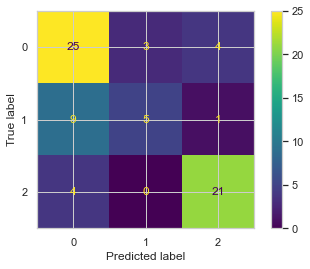

In [2044]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rfNew, X_test, y_test)

The diagram shown above is the confusion matrix which displays all the predictions made compared to the actual results. The data set is made up of 72 matches based on the test size. 25 wins were correctly predicted as well as 5 draws and 21 losses. The following chunk shows the evaluation metrics for the confusion metrics including the true accuracy, recall score, precision score, and f1 score. Since this is a 3x3 matrix there are three different values for each of the three scores (recall, precision, and f1). 

In [2045]:
tw, fwd, fwl, fdw, td, fdl, flw, fld, tl  = confusion_matrix(y_test, rfNewPred).ravel()

In [2046]:
accuracy = (tw + td + tl) / (tw +  td + tl + fwd + fwl + fdw + fdl + flw + fld)
recallW = (tw) / (tw + fdw + flw)
recallD = (td) / (fwd + td + fld)
recallL = (tl) / (fwl + fdl + tl)

precisionW = (tw) / (tw + fwd + fwl)
precisionD = (td) / (fdw + td + fdl)
precisionL = (tl) / (flw + fld + tl)

f1W = 2 * (precisionW * recallW) / (precisionW + recallW)
f1D = 2 * (precisionD * recallD) / (precisionD + recallD)
f1L = 2 * (precisionL * recallL) / (precisionL + recallL)

print('True accuracy: ', round(accuracy, 2))

print('Win Recall:        ', round(recallW, 2))
print('Draw Recall:        ', round(recallD, 2))
print('Loss Recall:        ', round(recallL, 2))

print('Win Precision:     ', round(precisionW, 2))
print('Draw Precision:     ', round(precisionD, 2))
print('Loss Precision:     ', round(precisionL, 2))

print('Win F1 score:      ', round(f1W, 2))
print('Draw F1 score:      ', round(f1D, 2))
print('Loss F1 score:      ', round(f1L, 2))

True accuracy:  0.71
Win Recall:         0.66
Draw Recall:         0.62
Loss Recall:         0.81
Win Precision:      0.78
Draw Precision:      0.33
Loss Precision:      0.84
Win F1 score:       0.71
Draw F1 score:       0.43
Loss F1 score:       0.82


In [2047]:
from sklearn import tree

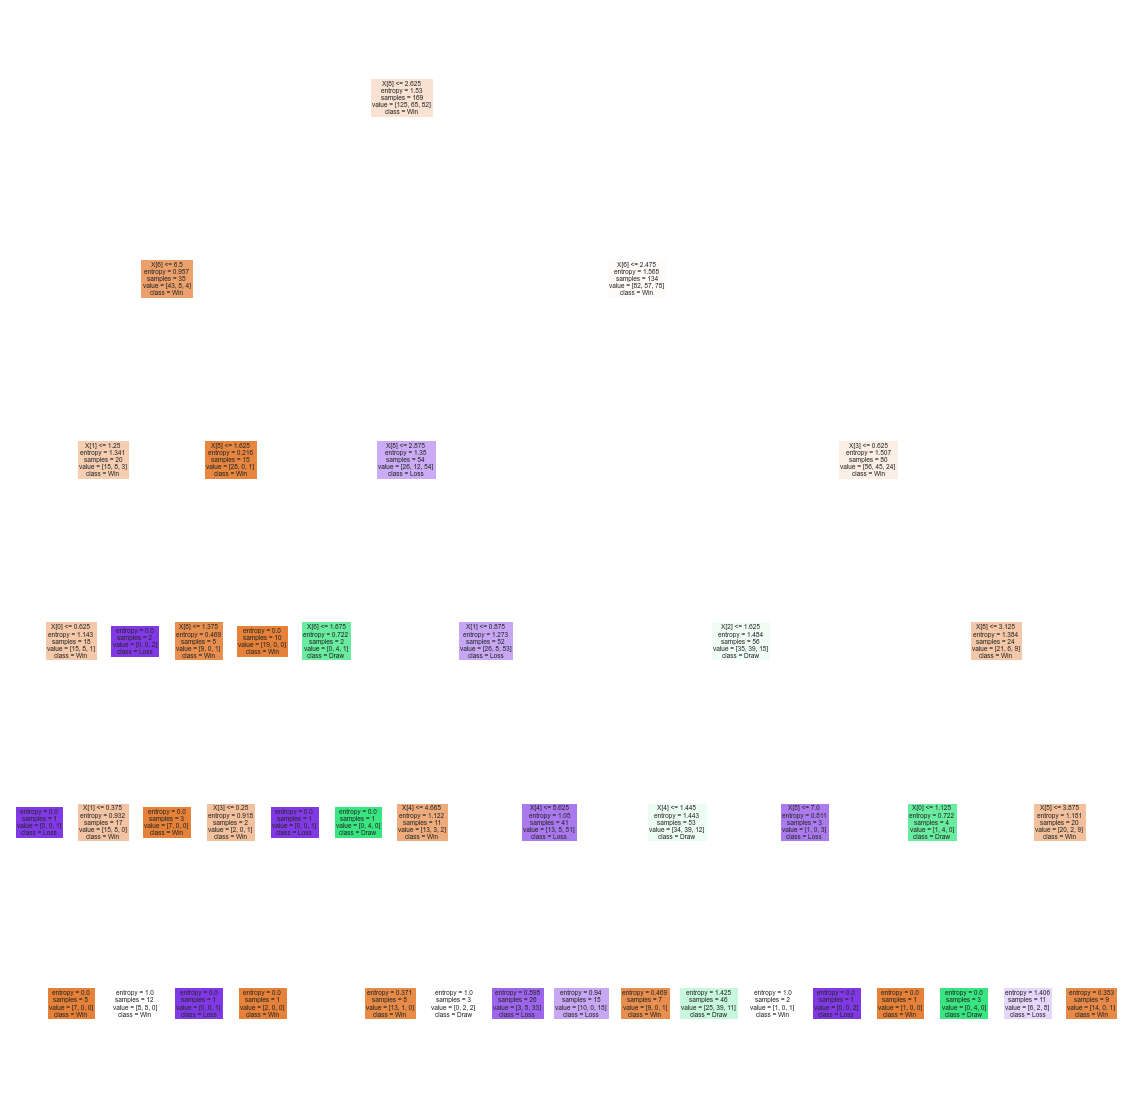

In [2146]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rfNew.estimators_[15], filled=True, class_names=['Win', 'Draw', 'Loss'])